## Machine Learning Algorithm
- 지도 학습 Supervised Learning
- 비지도 학습 Unsupervised Learning
- 강화 학습 Reinforcement Learning (실습X)

### 지도학습 Supervised Learning

#### k-NN(k-Nearest Neighbor)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier # classifier: 분류기

$$
    \begin{pmatrix}
    1 & 2 \\
    2 & 3 \\
    3 & 4 \\
    6 & 7 \\
    7 & 8 \\
    8 & 9 \\
    \end{pmatrix}
$$

In [9]:
# X_train = np.array([
#     [1, 2],
#     [2, 3],
#     [3, 4],
#     [6, 7]
#     [7, 8],
#     [8, 9]
# ])
# 모델 훈련용 데이터
X_train = np.array([[i, i+1] for i in range(1, 9) if i not in (4, 5)])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [18]:
# 모델 테스트용 데이터
X_test = np.array([[6, 5]])

In [19]:
# k-NN setting
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Test
predicted_label = knn.predict(X_test)

In [ ]:
plt.figure(figsize=(8, 6))
for i, point in enumerate(X_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 3 else ''))


plt.scatter(X_test[0, 0], X_test[0, 1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"k-NN Classification (k={K})\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

#### SVM(Support Vector Machine)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [34]:
# 복잡한 샘플 생성
X_train, y_train = make_blobs(n_samples=100, centers=2, random_state=3, cluster_std=2)

# 테스트 데이터
X_test = np.array([[0, 0]])

In [35]:
# 모델 생성
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [36]:
# 예측
predicted_label = svm_model.predict(X_test)

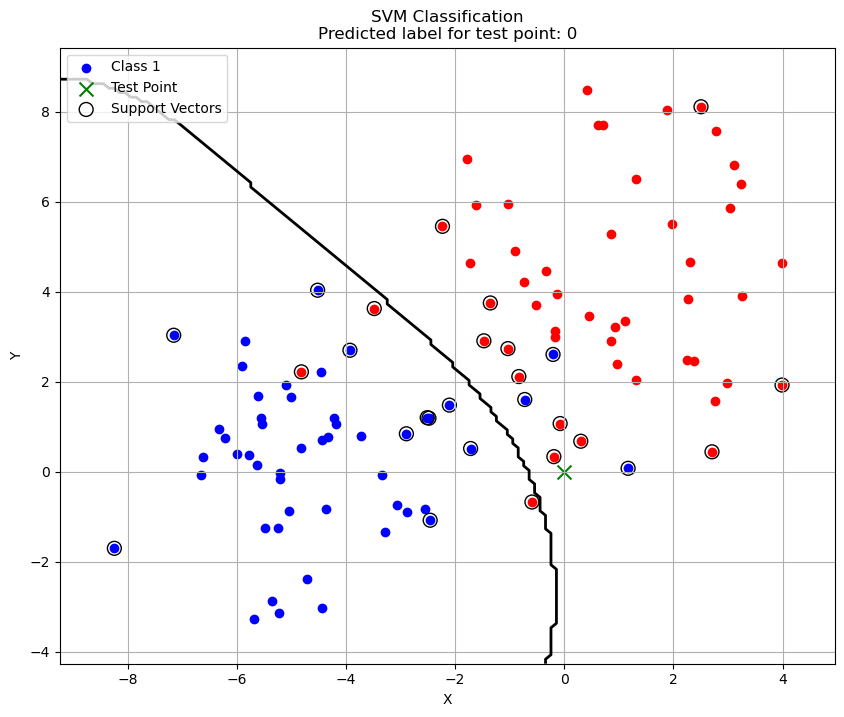

In [37]:
# 시각화
plt.figure(figsize=(10, 8))
for i, point in enumerate(X_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

plt.scatter(X_test[0, 0], X_test[0, 1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k',
            label='Support Vectors')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

In [49]:
# scatter visualize function
def scatter_vis(X_train, y_train, X_test, model,):
    """_summary_
    Args:
        X_train (_type_): 훈련 데이터 셋
        y_train (_type_): 훈련 데이터 레이블
        X_test (_type_): 테스트용 데이터
        model (_type_): 만든 머신러닝 모델 작성
        figsize (tuple, optional): Defaults to (6, 6).
    """
    # plt.figure(figsize=figsize)
    for i, point in enumerate(X_train):
        plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                    label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

    plt.scatter(X_test[0, 0], X_test[0, 1], c='g', marker='x', s=100, label='Test Point')

    x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    return xx, yy, Z

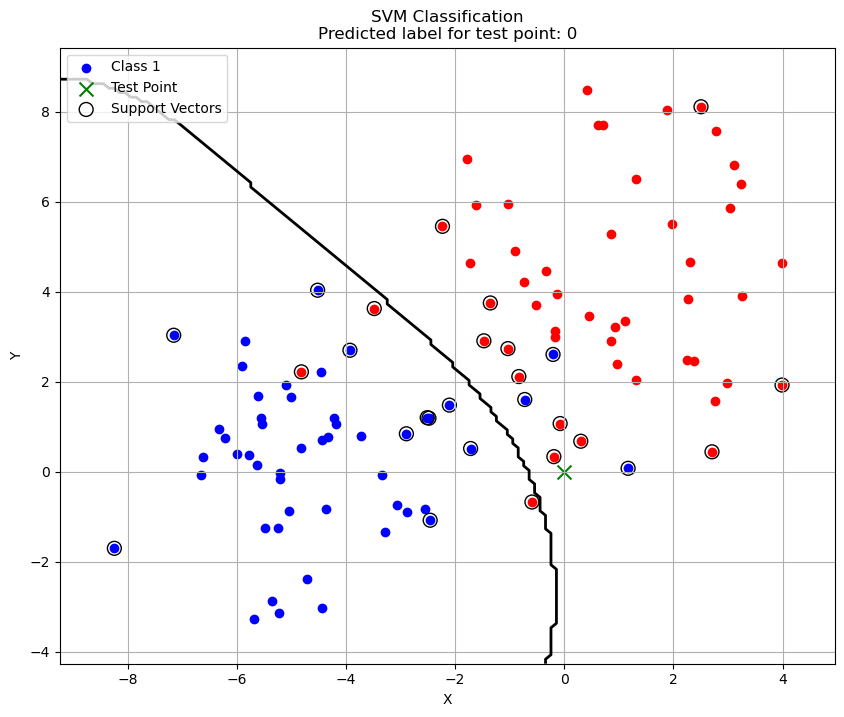

In [39]:
scatter_vis(X_train, y_train, X_test, svm_model, figsize=(10, 8))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# 서포트 벡터 시각화
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k',
            label='Support Vectors')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"SVM Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

#### Decision Tree

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [41]:
# 복잡한 샘플 데이터 생성
X_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 테스트 데이터
X_test = np.array([[0, 0]])

In [43]:
# DC tree 훈련
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# 예측
predicted_label = tree_model.predict(X_test)

In [ ]:
scatter_vis()

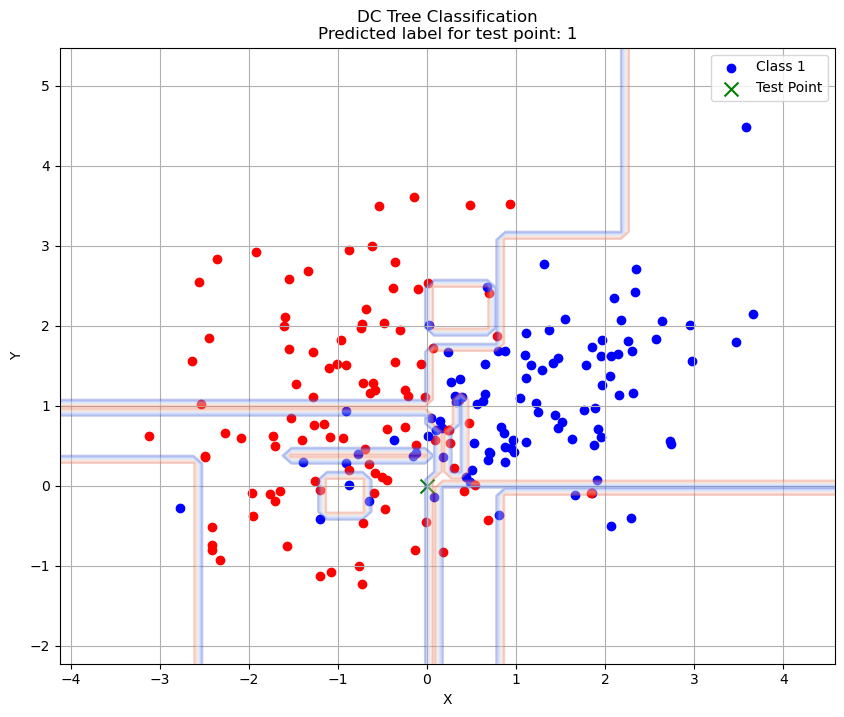

In [47]:
# 시각화
plt.figure(figsize=(10, 8))
for i, point in enumerate(X_train):
    plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))

plt.scatter(X_test[0, 0], X_test[0, 1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"DC Tree Classification\nPredicted label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

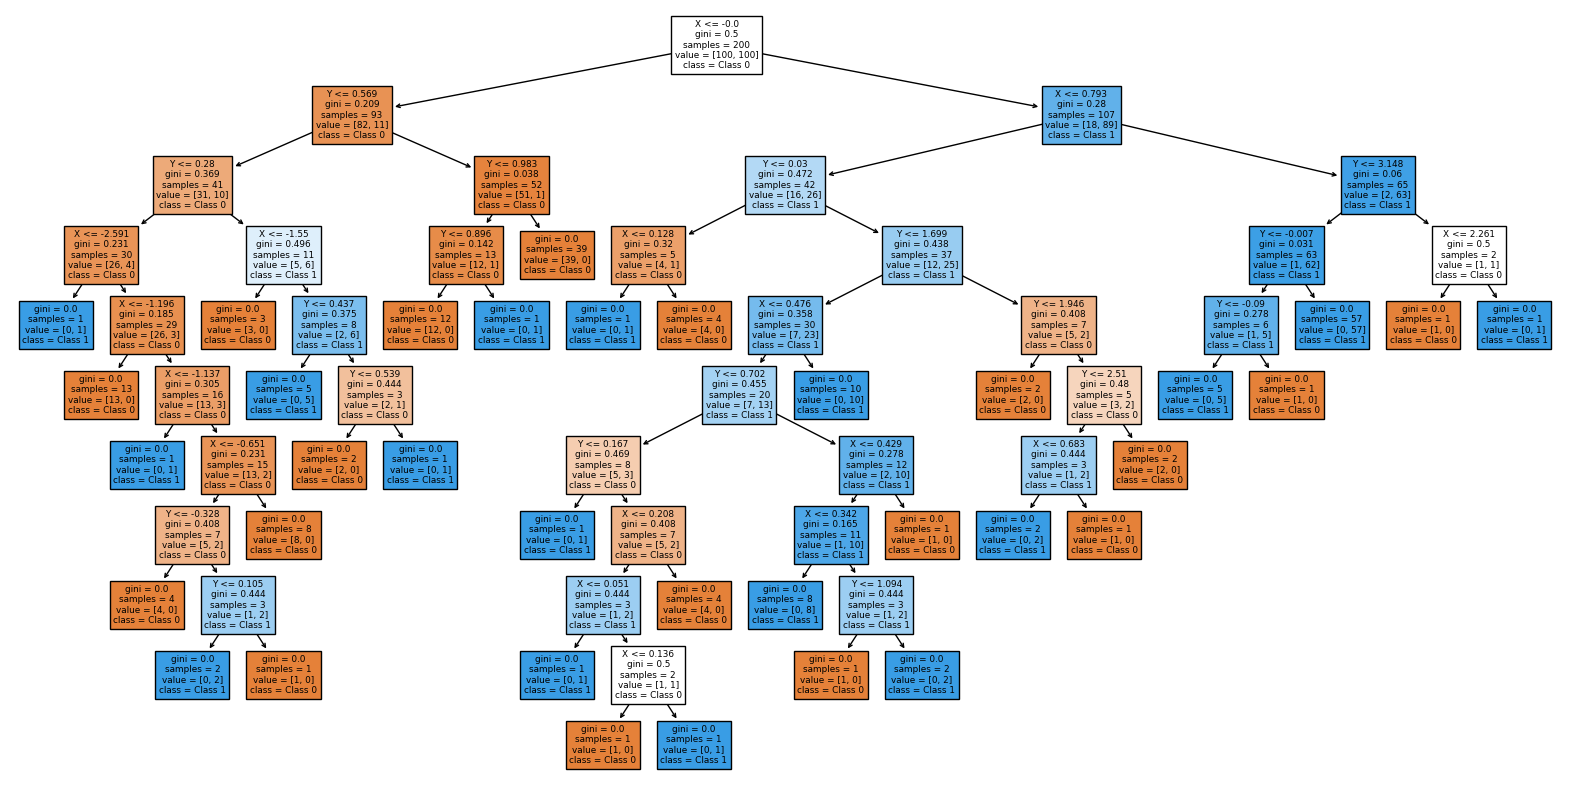

In [51]:
# 의사결정나무 구조 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=['X', 'Y'], class_names=['Class 0', 'Class 1'])
plt.show()

### 비지도학습 Unsupervised Learning

### k-means clustering
- k: 군집(클러스터)의 개수

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [53]:
# 데이터 불러오기
iris = load_iris()
X = iris.data

In [54]:
# 데이터 전처리 - 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# 모델 생성
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

c:\Users\KOREAVC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KOREAVC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [59]:
labels = kmeans.labels_ # label이 아닌 cluster값

In [60]:
# PCA(Principle Component Analysis, 주성분분석)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

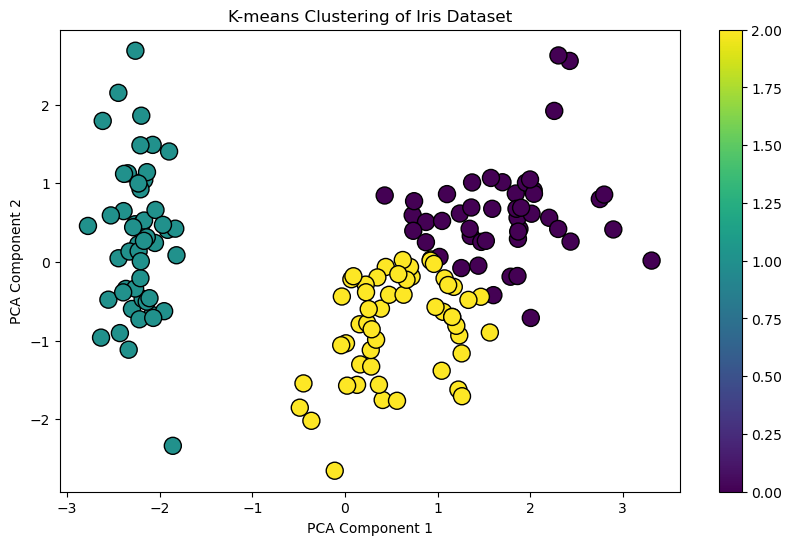

In [61]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [62]:
# Random data로 k-means clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

c:\Users\KOREAVC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KOREAVC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


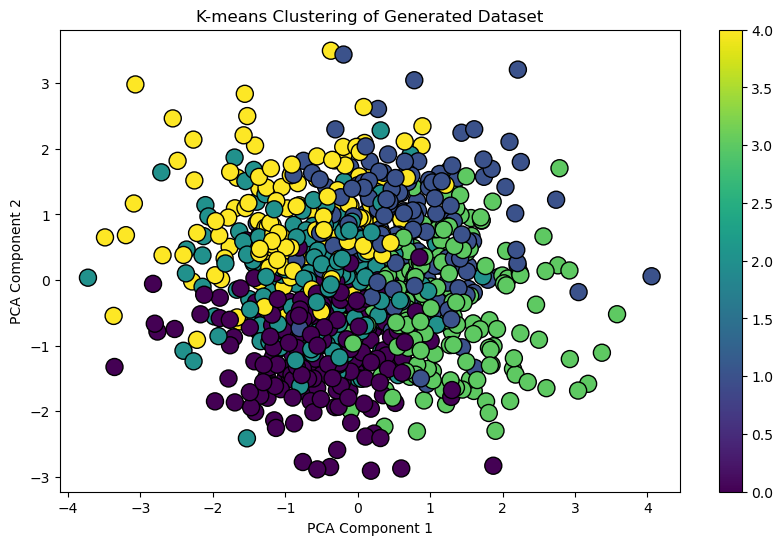

In [65]:
# 파라미터 설정 및 데이터 생성
n_samples = 1000
n_features = 10
n_clusters = 5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=1, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=150)
plt.title('K-means Clustering of Generated Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()